## Проверка гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels as sts 

import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('df_after_step3.csv', index_col = 0)
df

,usdrub,gold,cb_key_rate,fed_rate,imoex_open,imoex_close,ru_cpi,us_cpi,workday,first_workday,second_workday
09.10.2008,26.1629,767.98,11.0,1.40,637.93,700.37,100.91,100.867301,workday,0,0
10.10.2008,26.0695,743.23,11.0,1.40,0.00,700.37,100.91,100.867301,workday,0,0
13.10.2008,26.0695,743.23,11.0,1.40,700.37,666.37,100.91,100.867301,workday,1,0
14.10.2008,26.1111,726.16,11.0,1.40,666.81,755.22,100.91,100.867301,workday,0,1
15.10.2008,26.0871,712.49,11.0,1.40,755.22,689.71,100.91,100.867301,workday,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22.02.2023,74.8596,4442.45,7.5,4.65,2215.43,2212.40,100.46,99.631358,workday,0,0
24.02.2023,74.8596,4442.45,7.5,4.65,2209.10,2208.03,100.46,99.631358,day off,0,0
27.02.2023,74.8596,4442.45,7.5,4.65,2194.39,2241.10,100.46,99.631358,workday,1,0
28.02.2023,75.4323,4391.92,7.5,4.65,2246.26,2253.16,100.46,99.631358,workday,0,1


### Первая гипотеза
#### Разница между ценой открытия и закрытия IMOEX стастистически не значима

(Здесь и далее - уровень значимости равен 0,05)

H₀ : μₓ = μᵧ

H₁ : μₓ ≠ μᵧ ,

где μₓ - Математическое ожидание цены открытия, μᵧ - Математическое ожидание цены закрытия

Также важно упомянуть, что истинные дисперсии двух значений нам неизвестна, но мы принимаем их равными друг другу.

In [8]:
var_im_open = df.imoex_open.var()
var_im_close = df.imoex_close.var()  
                                                # Вычисляем несмещённую дисперсию и среднее по нашим данным
mean_im_open = df.imoex_open.mean()
mean_im_close = df.imoex_close.mean()

n_im_open = len(df.imoex_open)                  # Для формальности, посчитаем количество и тех и тех наблюдений
n_im_close = len(df.imoex_close)

In [10]:
# Подсчитываем дисперсию для t-статистики
var_im_0 = ((n_im_open - 1)*var_im_open + (n_im_close - 1)*var_im_close)/ (n_im_open + n_im_close -2)

In [29]:
t_stat_im = (mean_im_open - mean_im_close)/(((1/n_im_open + 1/n_im_close)*var_im_0)*(1/2))
t_stat_im

-0.0033809906402160438

In [36]:
alpha = 0.05
t_crit_1 = stats.t.ppf(1 - alpha/2, df=n_im_open+n_im_close-2) # Посчитали критические значения для выбранного уровня значимости
t_crit_2 = - stats.t.ppf(1 - alpha/2, df=n_im_open+n_im_close-2)

#### t-статистика приблизительно равна нулю, из чего почти сразу можно сделать вывод, но для наглядности нарисуем график

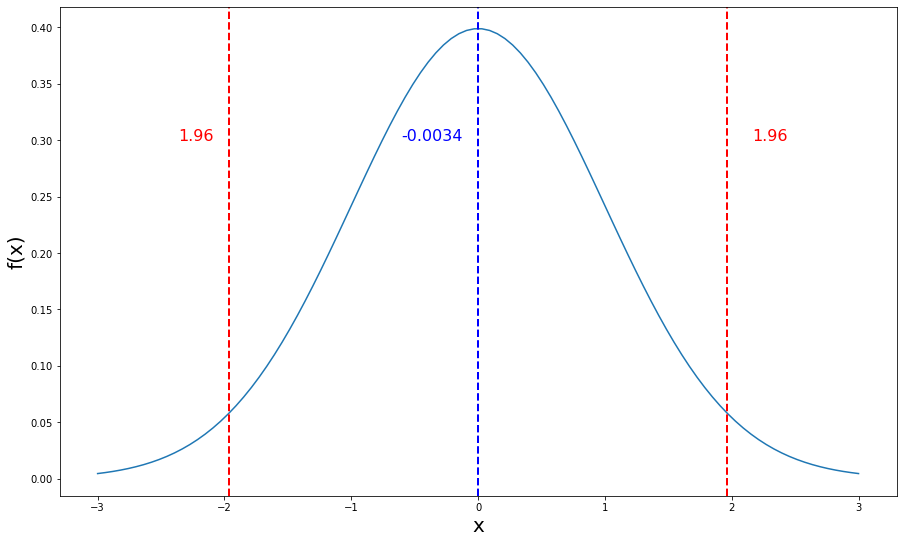

In [62]:
fig, ax = plt.subplots(figsize = (15, 9))

x = np.linspace(-3, 3, 100)
ax.plot(x, stats.t.pdf(x, df=n_im_open+n_im_close-2));
plt.ylabel('f(x)', fontsize=20);
plt.xlabel('x', fontsize=20);

plt.axvline(t_stat_im, color='blue', linestyle="--", lw=2);
plt.axvline(t_crit_1, color='red', linestyle="--", lw=2);
plt.axvline(t_crit_2, color='red', linestyle="--", lw=2);

plt.text(t_crit_2 - 0.4, 0.3, round(t_crit_1,2), color='red', fontsize=16);
plt.text(t_crit_1 + 0.2, 0.3, round(t_crit_1,2), color='red', fontsize=16);
plt.text(t_stat_im - 0.6, 0.3, round(t_stat_im,4), color='blue', fontsize=16);

### Из графика можем видеть, что полученная статистика не попадает в критическую область при выбранном нами уровне значимости (да и при любом адекватном уровне), а следовательно нулевая гипотеза подтвердилась, то есть, разница между ценой открытия и закрытия IMOEX действительно статистически незначима